# Titanic Prediction
This notebook is for predicting the passenger survival in the Titanics.
## Decision Tree
as a novice to kaggle, followed by https://www.kaggle.com/nedaamiri/titanic-decision-tree.

## Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA_PATH = '/home/chenyiwei/Kaggle/Titanic/input/'

import os
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/chenyiwei/Kaggle/Titanic/input/train.csv
/home/chenyiwei/Kaggle/Titanic/input/test.csv


## Train File

In [9]:
df_train = pd.read_csv(DATA_PATH + 'train.csv')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_train.info()    # the abstract of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_train.describe()    # the statistical infos about the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train.shape

(891, 12)

## Data Analysis

In [14]:
df_train['Survived'].value_counts()     # count the number of survivors and deaths

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

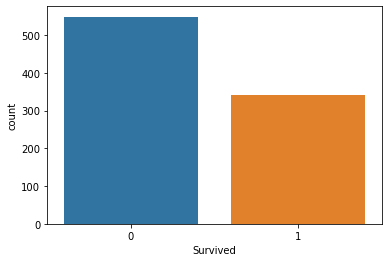

In [15]:
sns.countplot(data=df_train, x='Survived')     # draw the img of the survivors and deaths numbers

<AxesSubplot:>

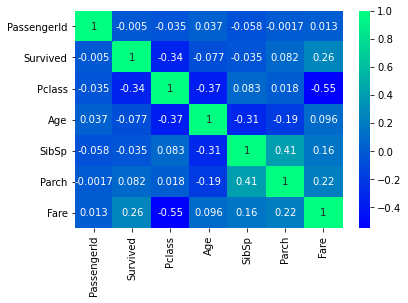

In [16]:
sns.heatmap(df_train.corr(), annot=True, cmap='winter')
# df.corr() can show the relevance between each columns
# cmap indicates the img color

## Data Prepration
handle the NaN 

In [17]:
((df_train.isnull().sum())/len(df_train))*100    

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
# because the cabin has nothing to do with the percentage of human survival, so we choose to drop it
df_train.drop('Cabin', axis=1, inplace=True)

In [19]:
# when the age is NaN, fill in the mean of the age
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [20]:
((df_train.isnull().sum())/len(df_train))*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    nan_percent = nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [23]:
nan_percent = missing_percent(df_train)

In [24]:
nan_percent

Embarked    0.224467
dtype: float64

In [25]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'], axis=1, inplace=True)

In [26]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [27]:
# make the sex from string to int
df_train.loc[df_train['Sex']=='male', 'Sex']=1
df_train.loc[df_train['Sex']=='female', 'Sex']=0

In [28]:
nan_percent = missing_percent(df_train)
nan_percent

Series([], dtype: float64)

In [29]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

## Features and Labels

In [30]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

**split tht data to train and val dataset**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

**scale the feature**
is it really necessary??

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)

## Model Train 

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model.predict(X_val)

## Evaluate the Model

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
confusion_matrix(y_val, y_pred)   # 混淆矩阵

array([[48,  3],
       [13, 26]])

In [39]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        51
           1       0.90      0.67      0.76        39

    accuracy                           0.82        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.83      0.82      0.82        90



In [40]:
model.feature_importances_    # the importance of each paras in the decision tree

array([0.14360848, 0.37852282, 0.32807077, 0.10199029, 0.04780764])

In [41]:
pd.DataFrame(index=X_train.columns, data=model.feature_importances_, columns=['feature importance'])

,feature importance
Pclass,0.143608
Sex,0.378523
Age,0.328071
SibSp,0.101990
Parch,0.047808


## Visualize the Tree

In [42]:
from sklearn.tree import plot_tree

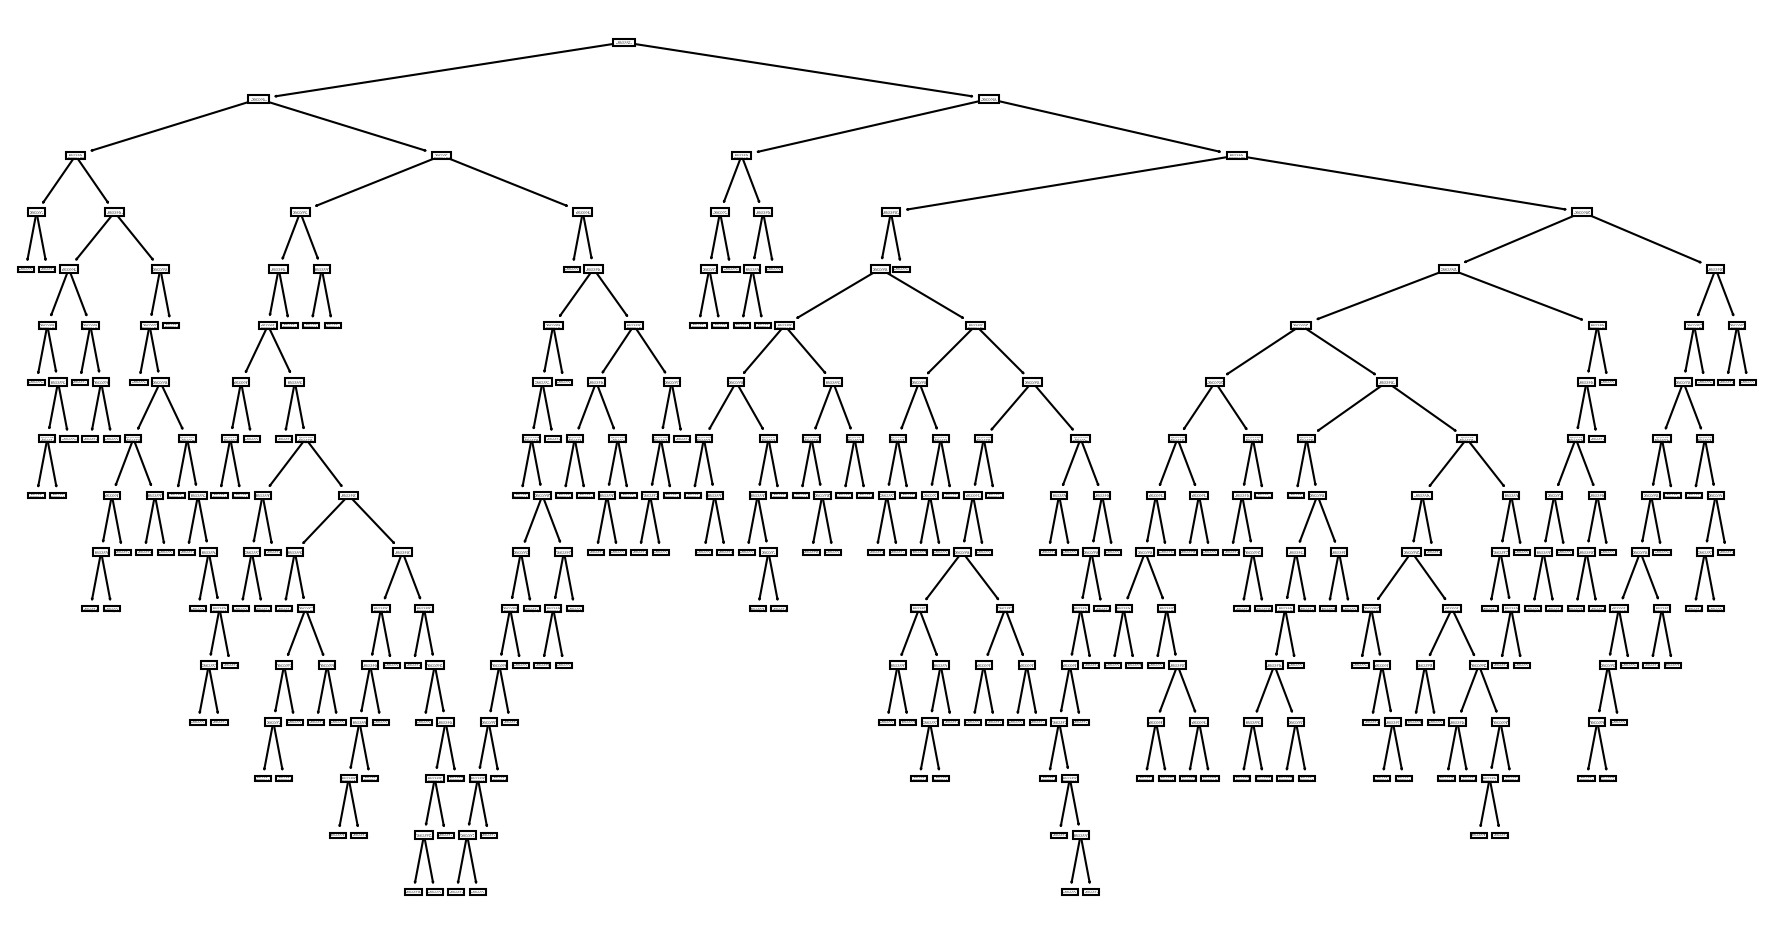

In [43]:
plt.figure(figsize=(15, 8), dpi=150)
plot_tree(model);

## Understanding Hyperparams

In [44]:
# help(DecisionTreeClassifier)

### max_depth

In [45]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [46]:
def report_model(model):
    model_preds = model.predict(X_val)
    print(classification_report(y_val,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X_val.columns);

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        51
           1       0.81      0.44      0.57        39

    accuracy                           0.71        90
   macro avg       0.75      0.68      0.68        90
weighted avg       0.74      0.71      0.69        90





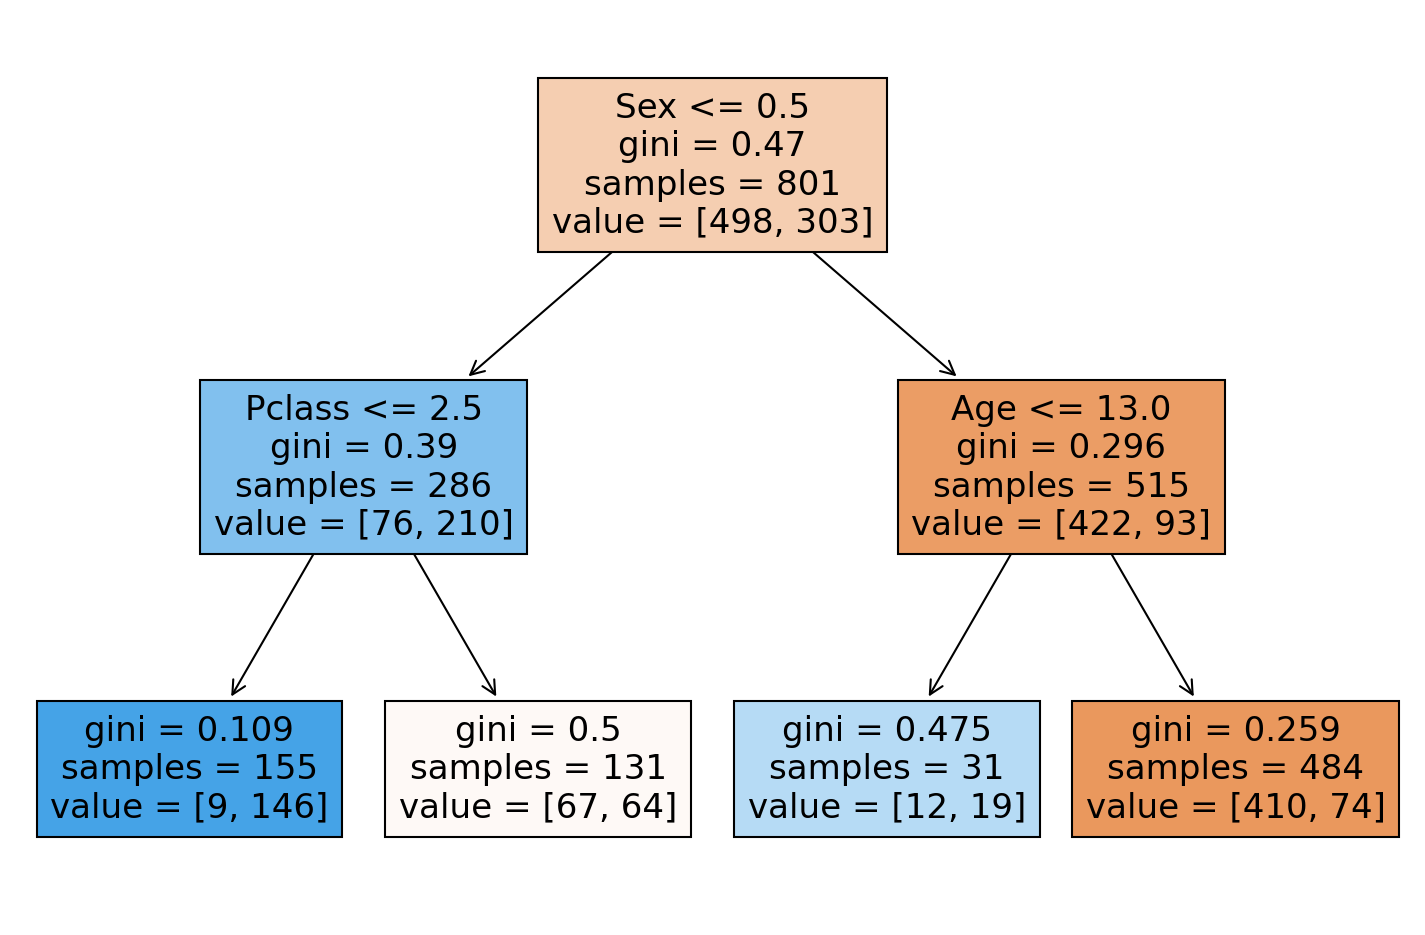

In [47]:
report_model(pruned_tree)

### max_leaf_nodes

In [48]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        51
           1       1.00      0.38      0.56        39

    accuracy                           0.73        90
   macro avg       0.84      0.69      0.68        90
weighted avg       0.82      0.73      0.70        90





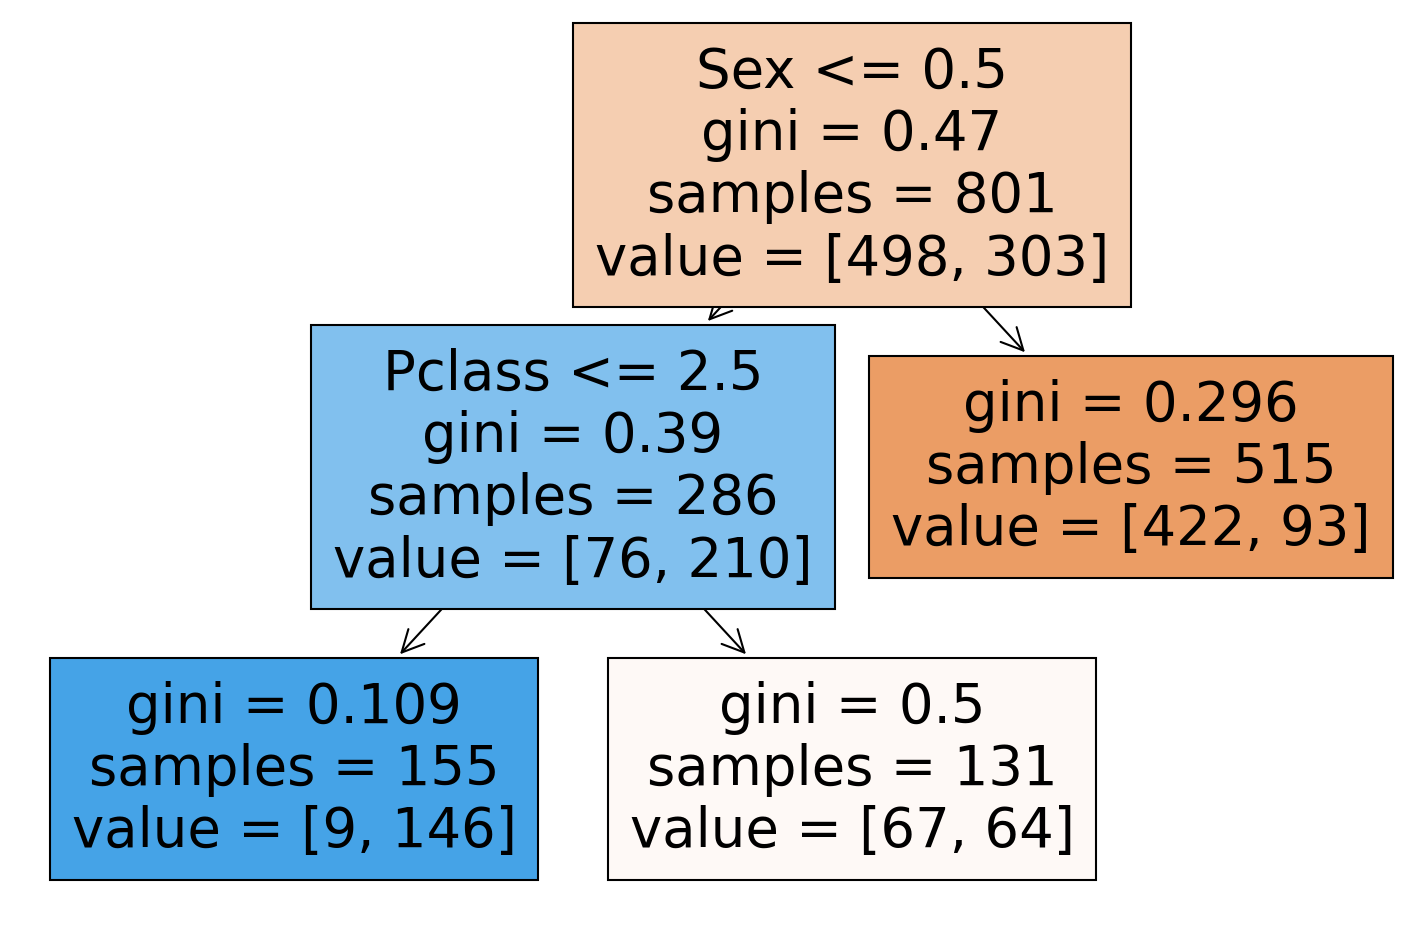

In [49]:
report_model(pruned_tree)

### Criterion

In [71]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90





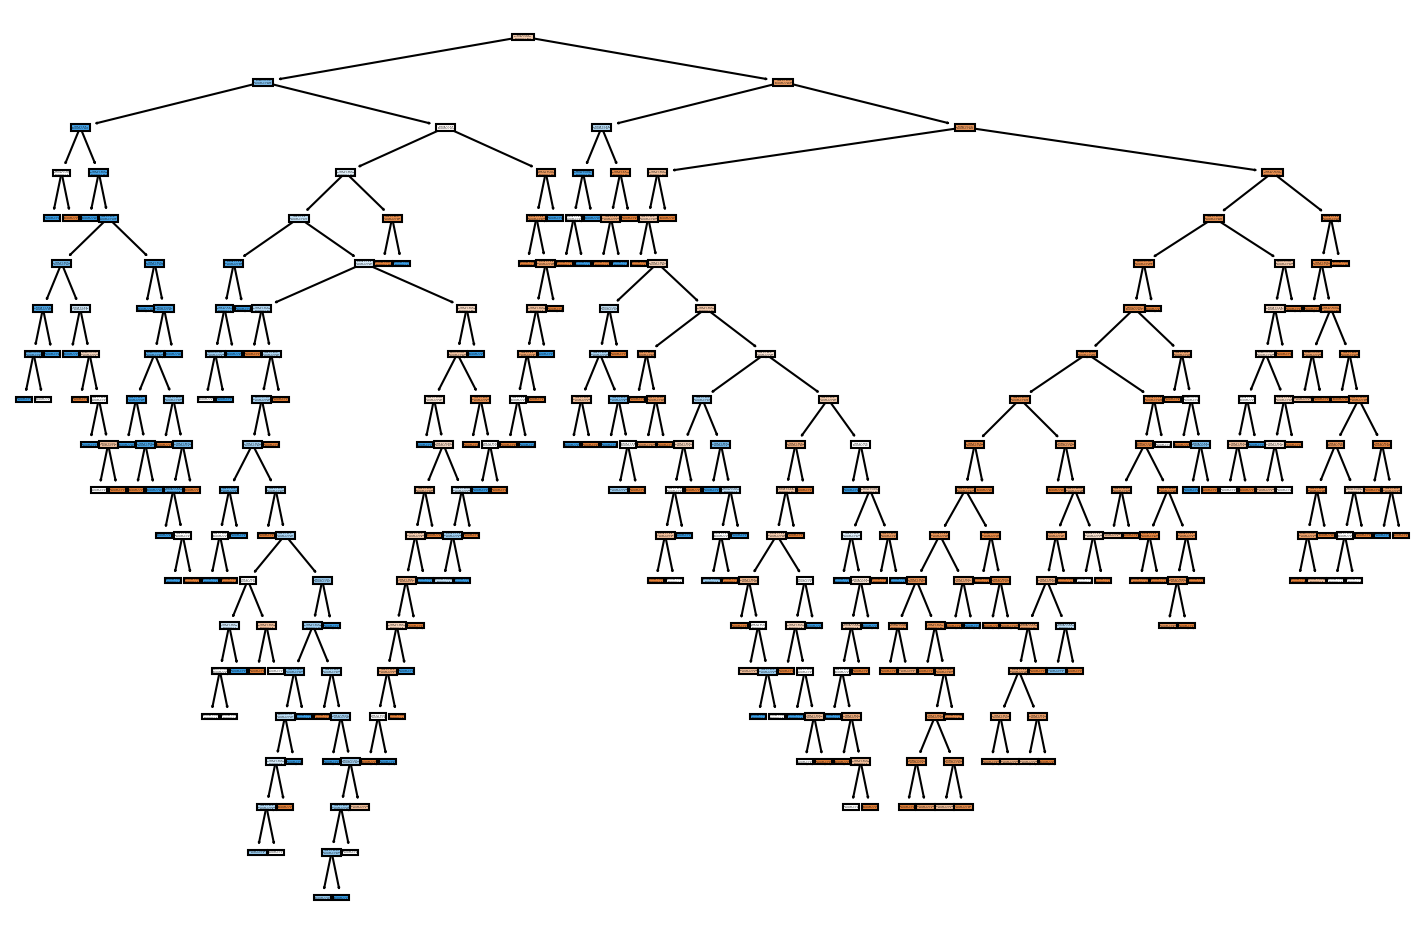

In [72]:
report_model(entropy_tree)

## Predict X_test

In [81]:
input = pd.read_csv(DATA_PATH + 'test.csv')
X_test = input.copy()
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
X_test.drop('Cabin', axis=1, inplace=True)

In [83]:
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [85]:
X_test.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)

In [86]:
X_test.loc[X_test['Sex']=='male','Sex']=1
X_test.loc[X_test['Sex']=='female','Sex']=0

In [87]:
scaled_X_test = scaler.transform(X_test)     # not really necessary

In [88]:
y_test = entropy_tree.predict(X_test)

## Submission File

In [89]:
y_test = pd.DataFrame(y_test)

In [90]:
y_test.head()

,0
0,0
1,0
2,1
3,1
4,0


In [91]:
y_test.columns=['Survived']

In [92]:
# y_test.head()

In [93]:
result = pd.concat([input[['PassengerId']], y_test], axis=1)

In [94]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [95]:
result.to_csv(DATA_PATH+'entropy_tree_submission.csv', index=False)